# Music Lyrics Through the Years

#### Import (possibly) necessary libraries

In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('ticks')

import re
from unicodedata import normalize

import requests as rq
from bs4 import BeautifulSoup as bs
from selenium import webdriver

import pickle

from functions.webscraping import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Scrape song title and artist

In [2]:
test_url = 'https://top40weekly.com/1960-all-charts/'

In [3]:
top10s_1960 = yearly_top10s(test_url)
len(top10s_1960)

103

In [4]:
top10s_1960

[('NORTH TO ALASKA', 'Johnny Horton'),
 ('STAIRWAY TO HEAVEN', 'Neil Sedaka'),
 ('WONDERLAND BY NIGHT', 'Bert Kaempfert'),
 ('WHAT IN THE WORLD’S COME OVER YOU', 'Jack Scott'),
 ('EL PASO', 'Marty Robbins'),
 ('SIXTEEN REASONS', 'Connie Stevens'),
 ('ITSY BITSY TEENIE WEENIE YELLOW POLKA DOT BIKINI', 'Brian Hyland'),
 ('WALKING TO NEW ORLEANS', 'Fats Domino'),
 ('THE THEME FROM “A SUMMER PLACE”', 'Percy Faith and His Orchestra'),
 ('ALONE AT LAST', 'Jackie Wilson'),
 ('GO, JIMMY, GO', 'Jimmy Clanton'),
 ('THEME FROM “THE APARTMENT”', 'Ferrante and Teicher'),
 ('THE TWIST', 'Chubby Checker'),
 ('LET’S GO, LET’S GO, LET’S GO', 'Hank Ballard and the Midnighters'),
 ('DEVIL OR ANGEL', 'Bobby Vee'),
 ('WHEN WILL I BE LOVED', 'The Everly Brothers'),
 ('MY HEART HAS A MIND OF ITS OWN', 'Connie Francis'),
 ('I’M SORRY', 'Brenda Lee'),
 ('I WANT TO BE WANTED', 'Brenda Lee'),
 ('LET THE LITTLE GIRL DANCE', 'Billy Bland'),
 ('THAT’S ALL YOU GOTTA DO', 'Brenda Lee'),
 ('FOOTSTEPS', 'Steve Lawrence

In [21]:
%%time

all_top10s = [
    yearly_top10s(f'https://top40weekly.com/{year}-all-charts/') for year in range(1960,2020)
]

len(all_top10s)

CPU times: user 14.2 s, sys: 136 ms, total: 14.3 s
Wall time: 1min 37s


60

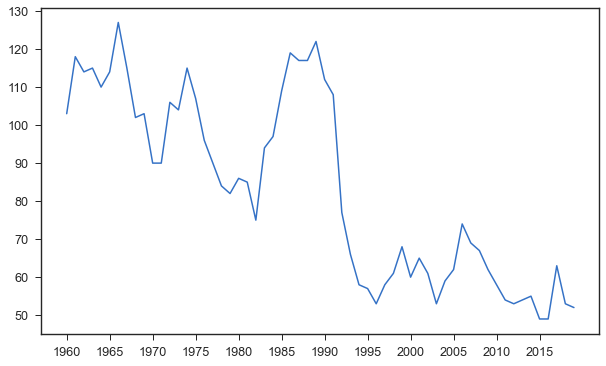

In [39]:
plt.figure(figsize=(10,6))
plt.plot([len(year) for year in all_top10s])
plt.xticks(ticks=range(0,60,5), labels=range(1960,2021,5))
plt.show()

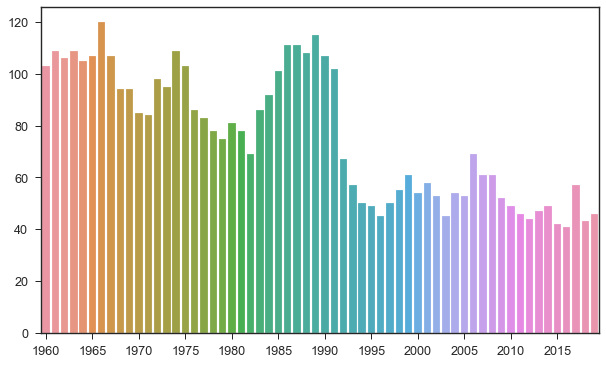

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(x=[year for year in range(1960,2020)], y=[len(year) for year in all_top10s])
plt.xticks(ticks=range(0,60,5), labels=range(1960,2021,5))
plt.show()

In [45]:
sum([len(year) for year in all_top10s])

4996

In [49]:
temp_dict = {}

for i,year in enumerate(all_top10s):
    for song in year:
        if song in temp_dict:
            print(song)
            all_top10s[i].remove(song)
            
        else:
            temp_dict[song] = 1
            
len(temp_dict)

('NORTH TO ALASKA', 'Johnny Horton')
('WONDERLAND BY NIGHT', 'Bert Kaempfert')
('THE TWIST', 'Chubby Checker')
('ARE YOU LONESOME TO-NIGHT', 'Elvis Presley')
('EXODUS', 'Ferrante and Teicher')
('LAST DATE', 'Floyd Cramer')
('A THOUSAND STARS', 'Kathy Young and the Innocents')
('MANY TEARS AGO', 'Connie Francis')
('SAILOR (Your Home Is the Sea)', 'Lolita')
('WALK ON BY', 'Leroy Van Dyke')
('HAPPY BIRTHDAY, SWEET SIXTEEN', 'Neil Sedaka')
('THE TWIST', 'Chubby Checker')
('CAN’T HELP FALLING IN LOVE', 'Elvis Presley')
('GOODBYE CRUEL WORLD', 'James Darren')
('THE LION SLEEPS TONIGHT', 'The Tokens')
('RUN TO HIM', 'Bobby Vee')
('PEPPERMINT TWIST (Part 1)', 'Joey Dee and the Starliters')
('HOTEL HAPPINESS', 'Brook Benton')
('BOBBY’S GIRL', 'Marcie Blane')
('ZIP-A-DEE DOO-DAH', 'Bob B')
('LIMBO ROCK', 'Chubby Checker')
('RETURN TO SENDER', 'Elvis Presley')
('GO AWAY LITTLE GIRL', 'Steve Lawrence')
('POPSICLES AND ICICLES', 'The Murmaids')
('SINCE I FELL FOR YOU', 'Lenny Welch')
('LOUIE LOUIE'

4149

In [50]:
sum([len(year) for year in all_top10s])

4569

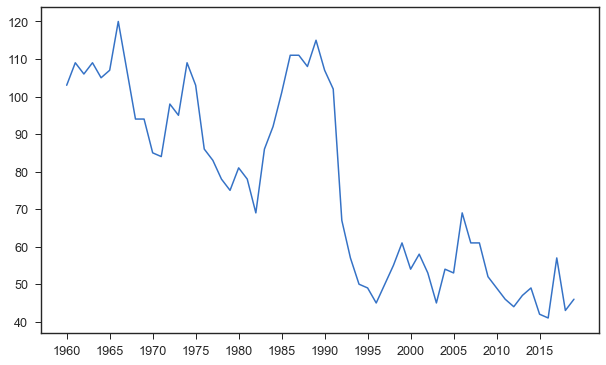

In [52]:
plt.figure(figsize=(10,6))
plt.plot([len(year) for year in all_top10s])
plt.xticks(ticks=range(0,60,5), labels=range(1960,2021,5))
plt.show()

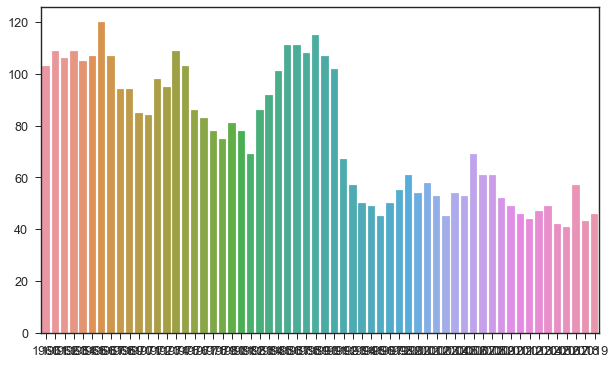

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(x=[year for year in range(1960,2020)], y=[len(year) for year in all_top10s]);

In [78]:
top10s = []
for i,year in enumerate(all_top10s):
    for song in year:
        song_dict = {}
        song_dict['year'] = i+1960
        song_dict['title'] = song[0]
        song_dict['artist'] = song[1]
        top10s.append(song_dict)
        
len(top10s)

4569

In [81]:
df = pd.DataFrame(top10s)
df.shape

(4569, 3)

In [83]:
df.head()

,year,title,artist
0,1960,NORTH TO ALASKA,Johnny Horton
1,1960,STAIRWAY TO HEAVEN,Neil Sedaka
2,1960,WONDERLAND BY NIGHT,Bert Kaempfert
3,1960,WHAT IN THE WORLD’S COME OVER YOU,Jack Scott
4,1960,EL PASO,Marty Robbins


In [84]:
df.tail()

,year,title,artist
4564,2019,BANDIT,Juice WRLD
4565,2019,MIDDLE CHILD,J
4566,2019,"10,000 HOURS",Dan
4567,2019,bad guy,Billie Eilish
4568,2019,WOW.,Post Malone


In [155]:
import lyricsgenius
import json

In [157]:
# parse the credentials for the twitter bot
with open('data/api_keys.json', 'r') as json_file:
    creds = json.load(json_file)

# set the credentials based on the credentials file
client_id = creds['client_id']
client_secret = creds['client_secret']
access_token = creds['access_token']

In [158]:
genius = lyricsgenius.Genius(access_token)

In [165]:
song = genius.search(f'{all_top10s[0][0][0]} {all_top10s[0][0][1]}')

In [167]:
genius.lyrics('https://genius.com/Johnny-horton-north-to-alaska-lyrics')

'Way up north (north to Alaska)\nWay up north (north to Alaska)\nNorth to Alaska\nWe\'re goin\' north, the rush is on\nNorth to Alaska\nWe\'re goin\' north, the rush is on\n\nBig Sam left Seattle in the year of ninety-two\nWith George Pratt his partner, and brother Billy too\nThey crossed the Yukon River and found a bonanza gold\nBelow that old white mountain, just a little southeast of Nome\n\nSam crossed the majestic mountains\nTo the valleys far below\nHe talked to his team of huskies\nAs he mushed on through the snow\nWith the northern lights a-runnin\' wild\nIn the land of the midnight sun\nYes, Sam McCord was a mighty man\nIn the year of nineteen-one\n\nWhere the river is windin\'\nBig nuggets they\'re finding\n\nNorth to Alaska\nWe\'re goin\' north, the rush is on\nWay up north (north to Alaska)\nWay up north (north to Alaska)\nNorth to Alaska\nWe\'re goin\' north, the rush is on\nNorth to Alaska\nWe\'re goin\' north, the rush is on\n\nGeorge turned to Sam with his gold in his h

In [170]:
song['hits'][0]['result']['path']

'/Johnny-horton-north-to-alaska-lyrics'

In [ ]:
genius.search_artist_songs()

In [85]:
url='https://genius.com/'

In [89]:
from webdriver_manager.chrome import ChromeDriverManager

In [135]:
# instantiate a selenium browser
driver = webdriver.Chrome(ChromeDriverManager().install())
# load webpage
driver.get(url)

driver.implicitly_wait(3)

search_box = driver.find_element_by_name('q').send_keys(f'{all_top10s[0][0][0]} {all_top10s[0][0][1]}')
driver.implicitly_wait(3)
driver.find_element_by_tag_name('svg').click()

[WDM] - Current google-chrome version is 86.0.4240
[WDM] - Get LATEST driver version for 86.0.4240
[WDM] - Driver [/Users/p.szymo/.wdm/drivers/chromedriver/mac64/86.0.4240.22/chromedriver] found in cache


In [136]:
driver.find_element_by_tag_name('svg').click()

In [143]:
driver.current_url

'https://genius.com/search?q=NORTH%20TO%20ALASKA%20Johnny%20Horton'

In [152]:
driver.find_elements_by_tag_name('a.href')

[]

In [ ]:
driver.find

In [144]:
page = rq.get(driver.current_url)
soup = bs(page.content, 'html.parser')

In [147]:
soup


<!DOCTYPE html>

<html class="snarly bagon_song_page--enabled song_stories_public_launch--enabled react_forums--disabled" lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml">
<head>
<base href="//genius.com/" target="_top"/>
<script type="text/javascript">
//<![CDATA[

  var _sf_startpt=(new Date()).getTime();
  if (window.performance && performance.mark) {
    window.performance.mark('parse_start');
  }

//]]>
</script>
<title>Genius | Song Lyrics &amp; Knowledge</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<meta content="app-id=709482991" name="apple-itunes-app"/>
<link href="https://assets.genius.com/images/apple-touch-icon.png?1605126809" rel="apple-touch-icon"/>
<link href="https://assets.genius.com/images/apple-touch-icon.png?1605126809" rel="apple-touch-icon"/>
<!-- Mobile IE allows us to activate ClearType technology for smo

In [153]:
soup.find('mini-song-card')

In [133]:
f'{all_top10s[0][0][0]} {all_top10s[0][0][1]}'

'NORTH TO ALASKA Johnny Horton'

In [134]:
search_box = driver.find_element_by_name('q').send_keys(f'{all_top10s[0][0][0]} {all_top10s[0][0][1]}')
driver.implicitly_wait(1)
driver.find_element_by_tag_name('svg').click()

In [131]:
driver.find_element_by_tag_name('svg').click()

In [ ]:
# lyrics through genius.com search bar
def poet_urls_by_genre(url='https://genius.com/'):
    
    '''
    Function to scrape PoetryFoundation.org for URLs to the pages
    of each poet within a genre, represented by a genre code.


    Input
    -----
    genre_code : int
        Code within genre page's URL.

    max_page_num : int
        Number of pages to iterate through (default=3).
        As of now, there are no more than 3 pages of poets per 
        genre.

    Output
    ------
    poet_urls : list (str)
        List of URLs to each poet's page.
    
    NOTE: Selenium is known to encounter issues, sometimes causing
          the function to not work properly. Try re-running if 
          output is not as expected.

    '''

    
    # instantiate a selenium browser
    driver = webdriver.Chrome()
    # load webpage
    driver.get(url)
    # find all links
    hrefs = driver.find_elements_by_xpath("//*[@href]")
    # find only links that match pattern for poet url
    pattern = re.compile(r'^.*/poets/(?!browse)[a-z\-]*$')
    poet_urls_by_page = [
        href.get_attribute('href') for href in hrefs if \
        pattern.match(href.get_attribute('href'))
    ]

            # only extend the list if there is something to extend
            if poet_urls_by_page:
                poet_urls.extend(poet_urls_by_page)
                # manually create some time between selenium browser, to
                # decrease chance of errors or IP block
                time.sleep(2.5)
            else:
                break
        # NOTE: a more specific except protocol may allow one to not have 
        # to re-run this function. One could re-run the try step until all 
        # possible links are grabbed
        except:
            break

    return poet_urls